# load modules


In [2]:
import pandas as pd
import torch
import torch.nn as nn
import tqdm
import torch.nn.functional as F
import os
import numpy as np
import random
import re
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, ks_1samp, kstest
import math
import torchvision
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))

from functions import *
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data

# fox attempt 1: normalized data, relu, first full dataset success

In [3]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt1/generated_images_full_data.pt"
original = torch.load(comparing_data_path)
attempt1_data = torch.load(generated_data_path, map_location = "cpu")


In [6]:
full_evaluation(attempt1_data, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 34.23%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 48.83%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  80.38%
inconsistency due to zgap in branch 33.58%
inconsistency due to last descendant dont exist 0.39%

Number of images with two or more inconsistencies = 12701, which is  50.35%
That corresponds to 33.12% of all images


Of all images, 32.12% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 52.87% have gap between branches inconsistency
Of all images, 22.09% have gap within branch inconsistency
Of all images, 0.26% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------

In [19]:
(32 + 1688) / (4910 + 3405 + 2206 + 759 + 125 + 32 + 1688)

0.13104761904761905

# fox attempt 2: normalized data, sigmoid function

In [7]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt2/generated_images_norm_data_sigmoid.pt"
attempt2_data = torch.load(generated_data_path, map_location = "cpu")


full_evaluation(attempt2_data, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  100.00%
inconsistency due to gap between branches =  92.32%
inconsistency due to zgap in branch 99.93%
inconsistency due to last descendant dont exist 100.00%

Number of images with two or more inconsistencies = 38348, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 100.00% have distance main branch inconsistency
Of all images, 92.32% have gap between branches inconsistency
Of all images, 99.93% have gap within branch inconsistency
Of all images, 100.00% have last descendant inconsistency


Analyzing generated merger tree dataset done


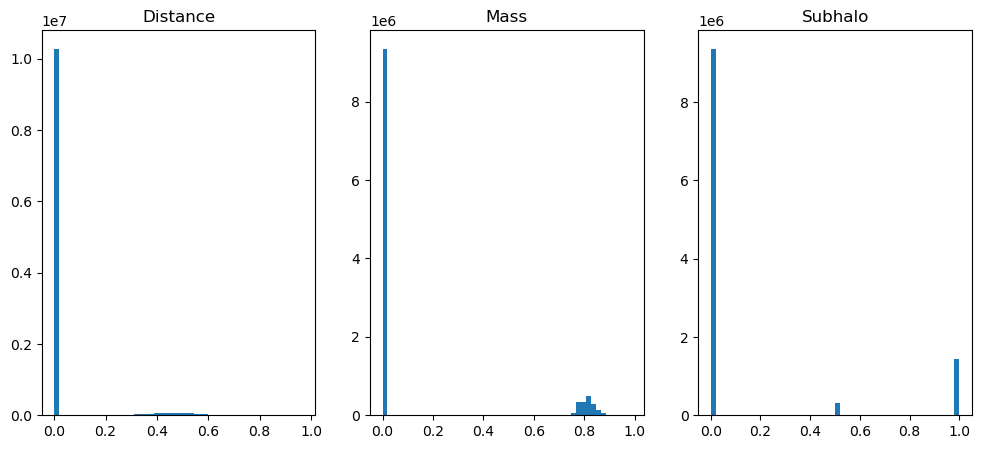

In [8]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt2/generated_images_norm_data_sigmoid.pt"
attempt2_data = torch.load(generated_data_path, map_location = "cpu")



dist = attempt2_data[:, 0]
mass = attempt2_data[:, 1]
subh = attempt2_data[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [11]:
# dist
print("dist:")
lower_threshold = 0.05
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.05
upper_threshold = 0.45
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.000001
upper_threshold = 0.49999
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.500001
upper_threshold = 0.99999
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.05 and 0.25: 0.17%

mass:
Percentage of values between 0.05 and 0.45: 0.13%

subh:
Percentage of values between 1e-06 and 0.49999: 0.00%

Percentage of values between 0.500001 and 0.99999: 0.00%



In [12]:
attempt2_data = transform_diffusion_image(attempt2_data, d_thresh = 0.22, m_tresh = 0.4, s_low = 0.4, s_high = 0.77)

full_evaluation(attempt2_data, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 40.09%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 47.28%
inconsistency due to distance not zero in main branch =  0.11%
inconsistency due to gap between branches =  57.94%
inconsistency due to zgap in branch 33.84%
inconsistency due to last descendant dont exist 0.48%

Number of images with two or more inconsistencies = 7739, which is  33.68%
That corresponds to 20.18% of all images


Of all images, 28.33% have zero inconsistency
Of all images, 0.07% have distance main branch inconsistency
Of all images, 34.71% have gap between branches inconsistency
Of all images, 20.27% have gap within branch inconsistency
Of all images, 0.29% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------

# fox attempt 3: original data, relu function

In [17]:
comparing_data_path = "data/dataset.pt"
original = torch.load(comparing_data_path)
generated_data_path = "models/fox_attempt3/generated_images_original_data_relu.pt"
attempt3_data = torch.load(generated_data_path, map_location = "cpu")


full_evaluation(attempt3_data, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 24.08%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 62.25%
inconsistency due to distance not zero in main branch =  2.29%
inconsistency due to gap between branches =  63.57%
inconsistency due to zgap in branch 34.67%
inconsistency due to last descendant dont exist 0.43%

Number of images with two or more inconsistencies = 14840, which is  50.97%
That corresponds to 38.70% of all images


Of all images, 47.26% have zero inconsistency
Of all images, 1.74% have distance main branch inconsistency
Of all images, 48.26% have gap between branches inconsistency
Of all images, 26.32% have gap within branch inconsistency
Of all images, 0.33% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------

## original dataset not normalized, relu activation get 40% consistant images

# fox attempt 4: original data, sigmoid function
doesnt make sense since sigmoid can only generate between 0 - 1

In [14]:
comparing_data_path = "data/dataset.pt"
generated_data_path = "models/fox_attempt4/generated_images_original_data_sigmoid.pt"
attempt4_data = torch.load(generated_data_path, map_location = "cpu")


full_evaluation(attempt4_data, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  100.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 100.00%
inconsistency due to last descendant dont exist 100.00%

Number of images with two or more inconsistencies = 38348, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 100.00% have distance main branch inconsistency
Of all images, 100.00% have gap between branches inconsistency
Of all images, 100.00% have gap within branch inconsistency
Of all images, 100.00% have last descendant inconsistency


Analyzing generated merger tree dataset done


# fox attempt 5: norm data, relu function

In [15]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt5/generated_images_norm_data_relu.pt"
attempt5_data = torch.load(generated_data_path, map_location = "cpu")


full_evaluation(attempt5_data, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 26.39%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 76.26%
inconsistency due to distance not zero in main branch =  8.71%
inconsistency due to gap between branches =  55.41%
inconsistency due to zgap in branch 38.41%
inconsistency due to last descendant dont exist 0.25%

Number of images with two or more inconsistencies = 16772, which is  59.42%
That corresponds to 43.74% of all images


Of all images, 56.13% have zero inconsistency
Of all images, 6.41% have distance main branch inconsistency
Of all images, 40.78% have gap between branches inconsistency
Of all images, 28.27% have gap within branch inconsistency
Of all images, 0.18% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------

# notes:
- sigmoid function creates 0.0% consistent merger trees, but manage to create merger trees with more branches (more complex merger trees)
- relu activation creates consistent merger trees, but low complexity and few branches, less nonzero values --> more sparse generations
- original data and sigmoid doesnt make sense to compare since original data has values up to 10.9, but sigmoid gives values between 0 and 1
- normalized with digmoid have the lowest KS score, just lower than normalized with relu.
- original data with relu performs just better on consistency, but lower on KS

# improve results

# attempt 1

In [16]:
import torch

generated_data_path = "models/fox_attempt1/generated_images_full_data.pt"
data = torch.load(generated_data_path, map_location = "cpu")

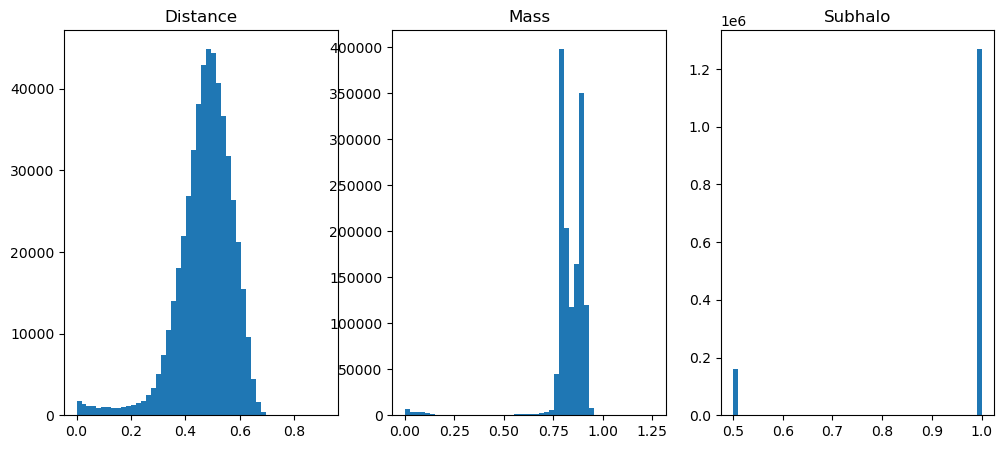

In [17]:
dist = data[:, 0]
mass = data[:, 1]
subh = data[:, 2]

nonzero_indices = torch.nonzero(dist.flatten())
dist = dist.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(mass.flatten())
mass = mass.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(subh.flatten())
subh = subh.flatten()[nonzero_indices[:, 0]]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [18]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.2
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.25
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

dist:
Percentage of values between 0.15 and 0.2: 0.55%

mass:
Percentage of values between 0.25 and 0.5: 0.30%



In [19]:
data_new = transform_diffusion_image(data, d_thresh = 0.2, m_tresh = 0.5, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = data_new[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

full_evaluation(data_new, original)

mass:
Percentage of values below 0.6985: 0.09%

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 37.13%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 35.46%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  73.25%
inconsistency due to zgap in branch 32.47%
inconsistency due to last descendant dont exist 0.81%

Number of images with two or more inconsistencies = 8387, which is  34.79%
That corresponds to 21.87% of all images


Of all images, 22.30% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 46.05% have gap between branches inconsistency
Of all images, 20.41% have gap within branch inconsistency
Of all images, 0.51% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------

Real images:


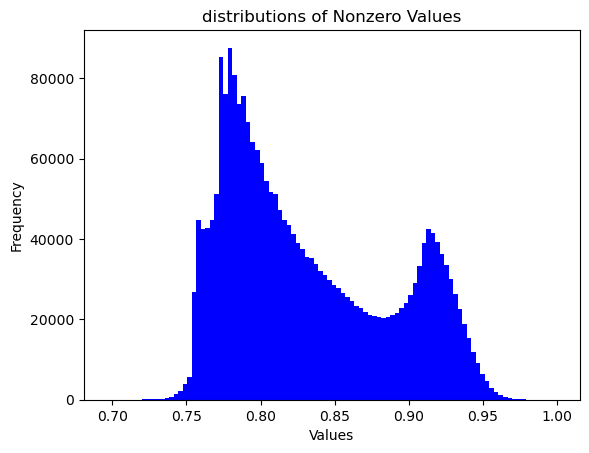

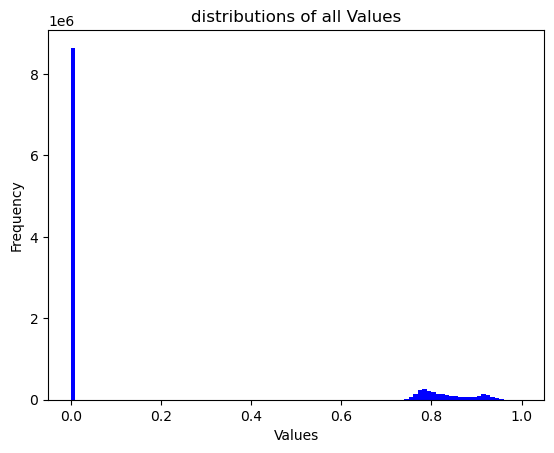

number of nonzero values = 2475374
Generated images:


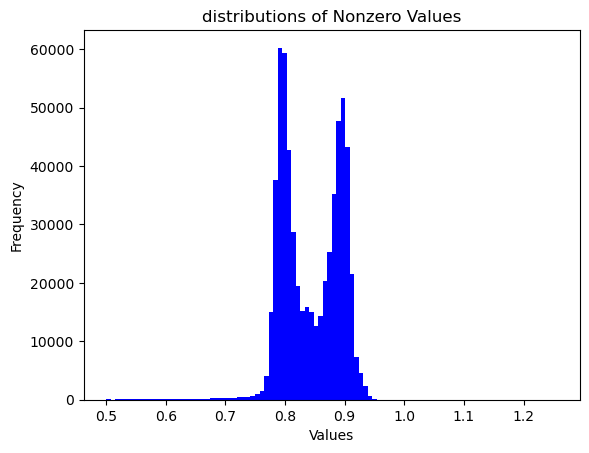

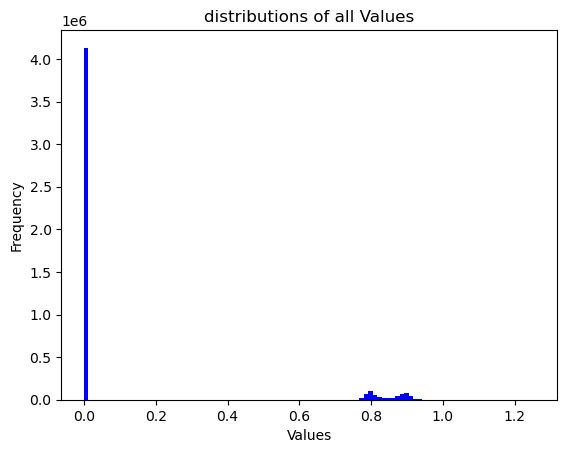

number of nonzero values = 608132


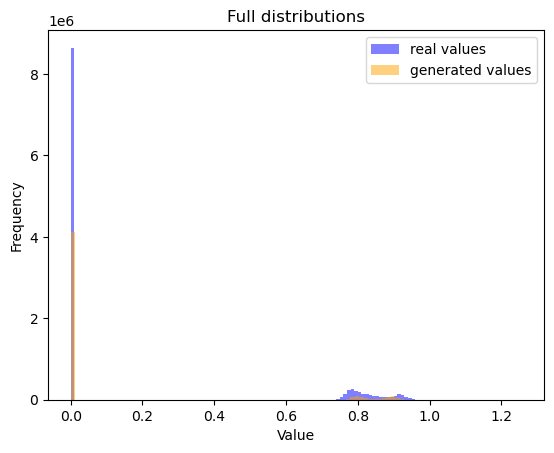

Full distribution:
KS Statistic: 0.09525658980033624
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0007:
The distributions are significantly different (reject H0), KS statistic 0.0953 > 0.0007


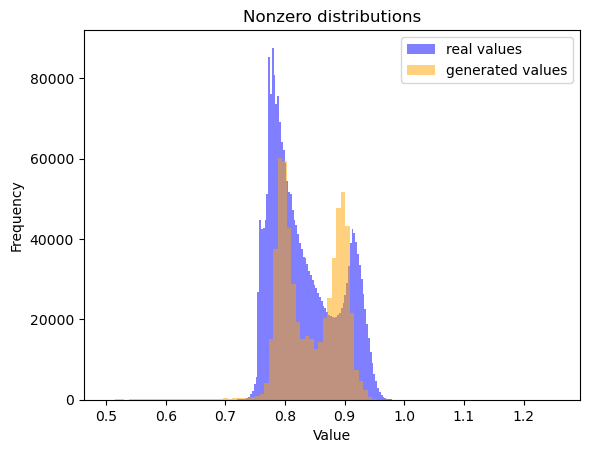

Nonzero distribution:
KS Statistic: 0.17187034998215198
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1719 > 0.0019


(0.09525658980033624, 0.17187034998215198)

In [47]:
og = torch.load("data/dataset_distlognorm_massnorm.pt")
ks_test(og, nearest_con, dim = 1)

# attempt 2

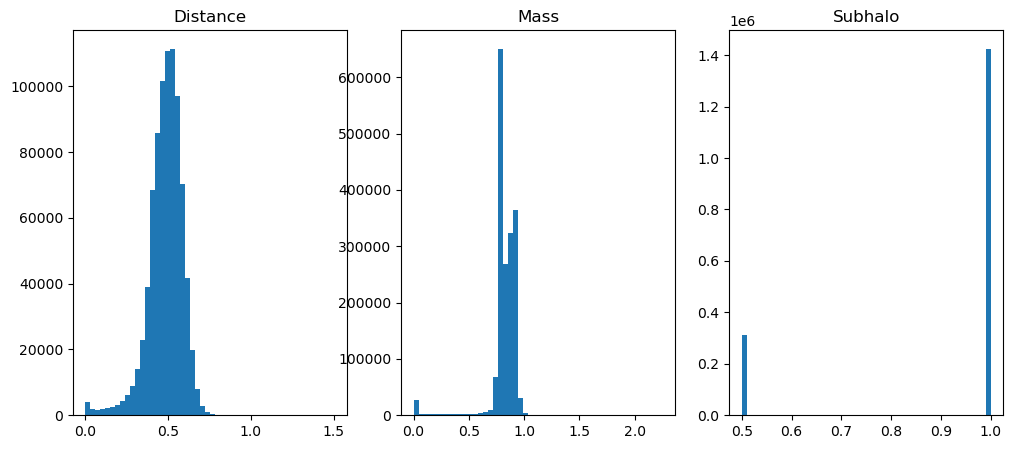

In [20]:
generated_data_path2 = generated_data_path = "models/fox_attempt5/generated_images_norm_data_relu.pt"
data2 = torch.load(generated_data_path2, map_location = "cpu")

dist = data2[:, 0]
mass = data2[:, 1]
subh = data2[:, 2]

nonzero_indices = torch.nonzero(dist.flatten())
dist = dist.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(mass.flatten())
mass = mass.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(subh.flatten())
subh = subh.flatten()[nonzero_indices[:, 0]]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [21]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.2
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.25
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

dist:
Percentage of values between 0.15 and 0.2: 0.56%

mass:
Percentage of values between 0.25 and 0.5: 0.72%



In [22]:
data_new2 = transform_diffusion_image(data2, d_thresh = 0.2, m_tresh = 0.5, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = data_new2[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

full_evaluation(data_new2, original)

mass:
Percentage of values below 0.6985: 0.17%

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 34.49%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 58.06%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  50.35%
inconsistency due to zgap in branch 38.88%
inconsistency due to last descendant dont exist 0.13%

Number of images with two or more inconsistencies = 10087, which is  40.15%
That corresponds to 26.30% of all images


Of all images, 38.04% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 32.98% have gap between branches inconsistency
Of all images, 25.47% have gap within branch inconsistency
Of all images, 0.09% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
------------------------------------------------------------------------------------------------

Real images:


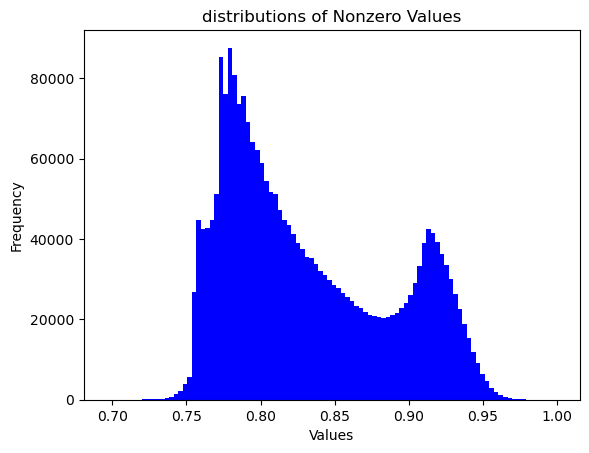

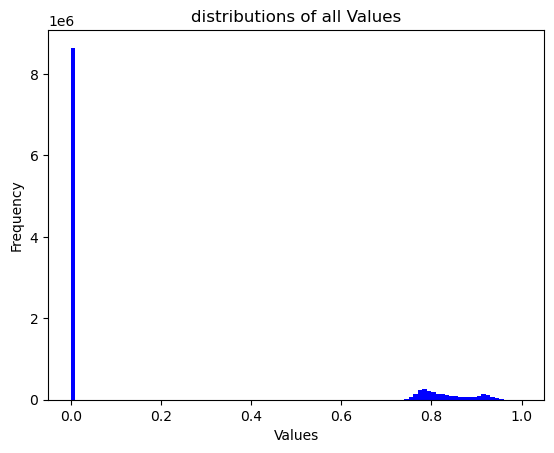

number of nonzero values = 2475374
Generated images:


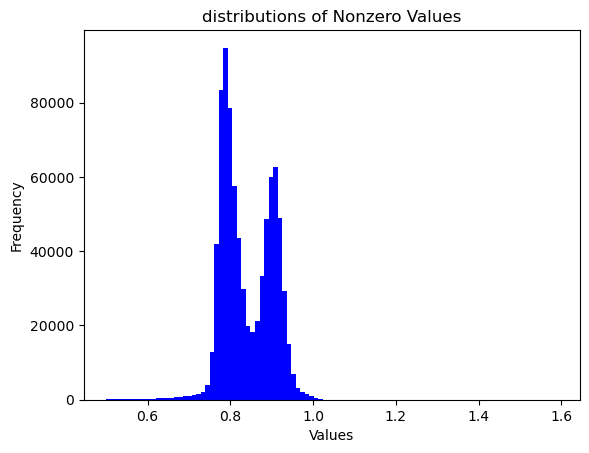

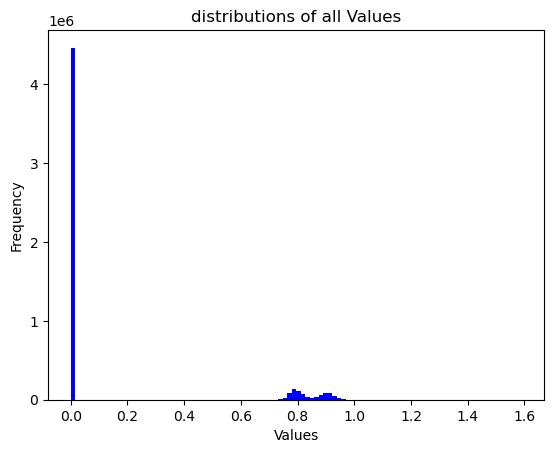

number of nonzero values = 831758


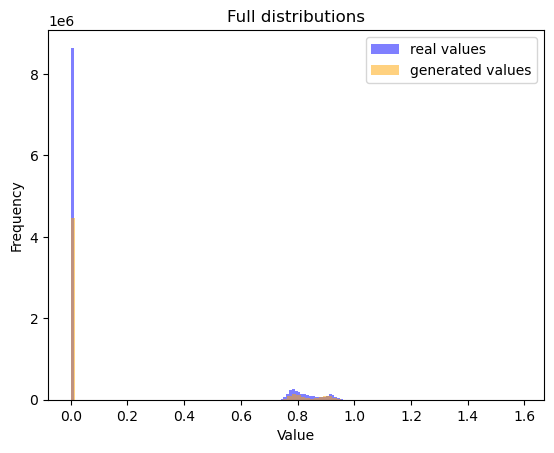

Full distribution:
KS Statistic: 0.06785877437257082
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0007:
The distributions are significantly different (reject H0), KS statistic 0.0679 > 0.0007


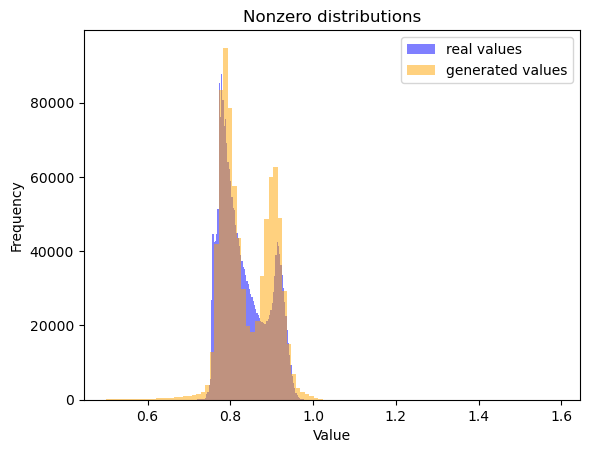

Nonzero distribution:
KS Statistic: 0.10306153430767262
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0017:
The distributions are significantly different (reject H0), KS statistic 0.1031 > 0.0017


(0.06785877437257082, 0.10306153430767262)

In [46]:
og = torch.load("data/dataset_distlognorm_massnorm.pt")
ks_test(og, nearest_con2, dim = 1)